In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

In [3]:
#create plane and plot
def plot_v_dif(v_vector, w_vector):
    
    v = [np.float64(v_vector[0]), np.float64(v_vector[1])]
    w = [np.float64(w_vector[0]), np.float64(w_vector[1])]

    array = np.array([[0, 0, v[0], v[1]], 
                     [0, 0, w[0], w[1]]])

    X, Y, V, W = zip(*array)
    plt.figure()
    plt.ylabel('Y-axis')
    plt.xlabel('X-axis')
    ax = plt.gca()
    ax.quiver(X, Y, V, W, angles='xy', scale_units='xy',color=['r','b'],scale=1)
    ax.set_xlim([-10, 10])
    ax.set_ylim([-10, 10])

    plt.grid()
    plt.draw()
    plt.show()

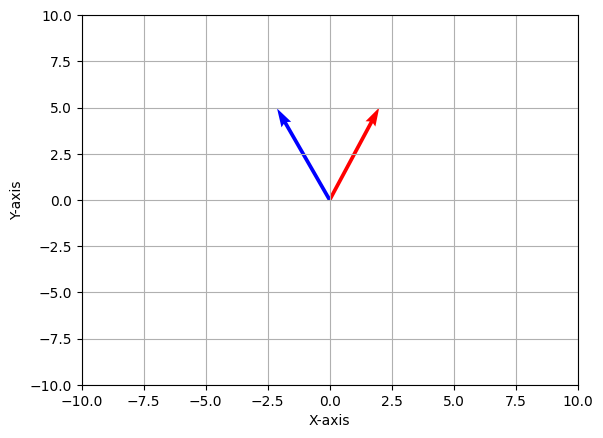

In [4]:
# Function to apply a affine rotate transformation to a vector
def rotate_vector(v_vector, angle):
    angle = np.deg2rad(angle)
    v = [np.float64(v_vector[0]), np.float64(v_vector[1])]
    v_rot = [v[0]*np.cos(angle) - v[1]*np.sin(angle), v[0]*np.sin(angle) + v[1]*np.cos(angle)]
    return v_rot

v_vector = np.matrix([[2],[5]])
w_vector = rotate_vector(v_vector, 45)
plot_v_dif(v_vector, w_vector)

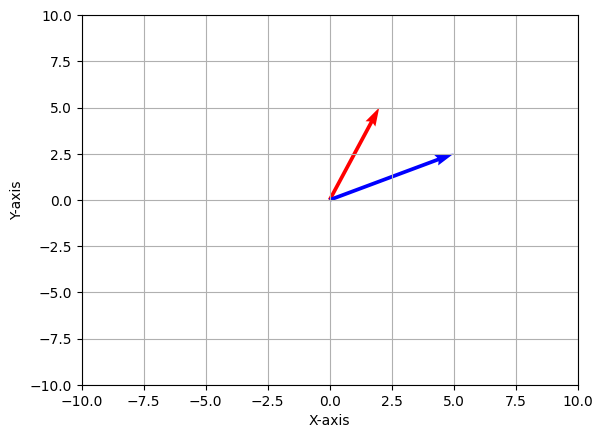

In [5]:
# Function to apply a affine translate transformation to a vector
def translate_vector(v, t):
    v = [np.float64(v_vector[0]), np.float64(v_vector[1])]
    w = [v[0] + t[0], v[1] + t[1]]
    return w

v_vector = np.matrix([[2],[5]])
t_vector = np.matrix([[3],[-2.5]])
w_vector = translate_vector(v_vector, t_vector)
plot_v_dif(v_vector, w_vector)

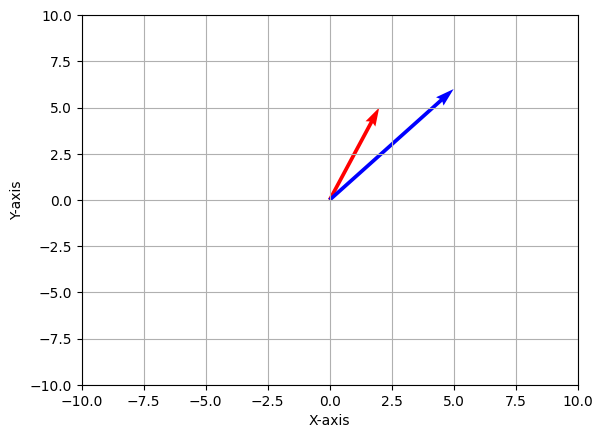

In [6]:
# Function to apply a affine scale transformation to a vector
def scale_vector(v, s):
    v = [np.float64(v_vector[0]), np.float64(v_vector[1])]
    w = [v[0]*s[0], v[1]*s[1]]
    return w

v_vector = np.matrix([[2],[5]])
s_vector = np.matrix([[3],[1]])
w_vector = translate_vector(v_vector, s_vector)
plot_v_dif(v_vector, w_vector)

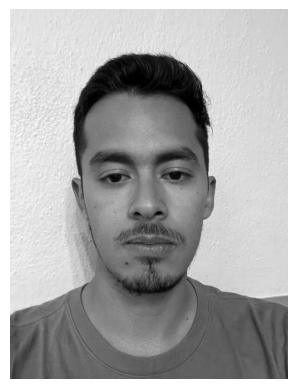

In [7]:
img = Image.open('../images/my-photo.jpg').convert('L')
img = np.int16(img)
plt.axis('off')
plt.imshow(img, cmap="gray")

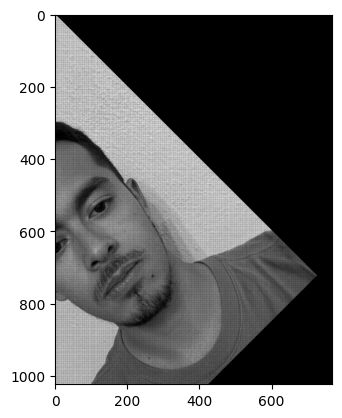

In [8]:
# Function to apply a affine rotate transformation to an image
def affine_transform_rotate(img, angle):
    n, m = img.shape
    img_rotate = np.zeros(shape=(n,m))

    theta = np.radians(angle)
    c, s = np.cos(theta), np.sin(theta)
    R = np.array([[1,0,n/2],[0,1,m//2],[0,0,1]]) @ np.array([[c,s,0],[s,-c,0],[0,0,1]]) @ np.array([[1,0,-n//2],[0,1,-m//2],[0,0,1]])

    for i in range(n):
        for j in range(m):
            coords = np.array([i,j, 1])
            coords = coords @ R
            x, y, z  = coords.astype(int)
            if x >= 0 and x < n and y >= 0 and y < m:    
                img_rotate[x][y] = img[i][j] 
    
    return img_rotate

img_copy = img.copy()
img_copy = affine_transform_rotate(img_copy, 45)
plt.imshow(img_copy, cmap="gray")

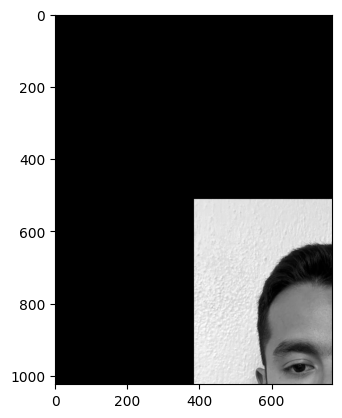

In [9]:
# Function to apply a affine translate transformation to an image
def affine_transform_translate(img, tx, ty):
    n, m = img.shape
    img_translate = np.zeros(shape=(n,m))

    T = np.array([[1,0,tx],[0,1,ty],[0,0,1]])

    for i in range(n):
        for j in range(m):
            coords = np.array([i,j, 1])
            coords = T @ coords
            x, y, z  = coords.astype(int)
            if x >= 0 and x < n and y >= 0 and y < m:    
                img_translate[x][y] = img[i][j] 
    
    return img_translate

img_copy = img.copy()
img_copy = affine_transform_translate(img_copy, img_copy.shape[0]//2, img_copy.shape[1]//2)
plt.imshow(img_copy, cmap="gray")

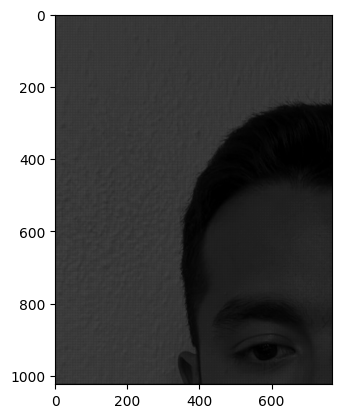

In [10]:
# Function to apply a affine scale transformation to an image
def affine_transform_scale(img, sx, sy):
    n, m = img.shape
    img_scale = np.zeros(shape=(n,m))
    S = np.array([[sx,0,0],[0,sy,0],[0,0,1]])
    for i in range(n):
        for j in range(m):
            coords = np.array([i,j, 1])
            coords = coords @ S
            x, y, z  = coords.astype(int)
            if x >= 0 and x < n and y >= 0 and y < m:    
                img_scale[x][y] = img[i][j] 
    
    return img_scale

img_copy = img.copy()
img_copy = affine_transform_scale(img_copy, 2.0,2.0)
plt.imshow(img_copy, cmap="gray")

In [ ]:
img_copy = img.copy()
# Scale to 200x200
img_copy = affine_transform_scale(img_copy, 200/img_copy.shape[0],200/img_copy.shape[1])
# Rotate 90 degrees
img_copy = affine_transform_rotate(img_copy, 90)
# Translate 10 on y axis
img_copy = affine_transform_translate(img_copy, 0, 10)
# Scale
img_copy = affine_transform_scale(img_copy, )
